In [1]:
import tensorflow as tf

In [2]:
tf.__version__


'2.3.0'

In [3]:
x = tf.Variable(10)

In [4]:
y = tf.Variable(5)

In [5]:
f=x+y

In [6]:
tf.print(f)

15


In [7]:
x = tf.constant([[1,2,3],[4,5,6]])

In [8]:
y = tf.constant([[7,8,9],[5,9,1]])

In [9]:
x+y

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 8, 10, 12],
       [ 9, 14,  7]])>

In [10]:
x-y

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[-6, -6, -6],
       [-1, -4,  5]])>

In [11]:
tf.add(x,y)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 8, 10, 12],
       [ 9, 14,  7]])>

In [12]:
x*y

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7, 16, 27],
       [20, 45,  6]])>

In [13]:
mnist = tf.keras.datasets.mnist

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
import matplotlib.pyplot as plt

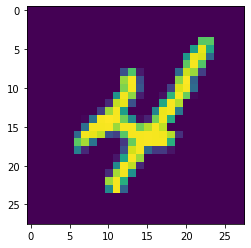

In [16]:
plt.imshow(x_train[9])

In [17]:
x_train, x_test = x_train/255.0, x_test/255.0

In [19]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [21]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [22]:
optimizer = tf.keras.optimizers.Adam()

In [23]:
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 1s 724us/step - loss: 1.5697 - accuracy: 0.9021 - val_loss: 1.5168 - val_accuracy: 0.9465
Epoch 2/5
1875/1875 [==============================] - 1s 656us/step - loss: 1.5114 - accuracy: 0.9520 - val_loss: 1.5000 - val_accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 1s 652us/step - loss: 1.4994 - accuracy: 0.9633 - val_loss: 1.4946 - val_accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 1s 659us/step - loss: 1.4931 - accuracy: 0.9693 - val_loss: 1.4950 - val_accuracy: 0.9664
Epoch 5/5
1875/1875 [==============================] - 1s 657us/step - loss: 1.4894 - accuracy: 0.9724 - val_loss: 1.4911 - val_accuracy: 0.9699


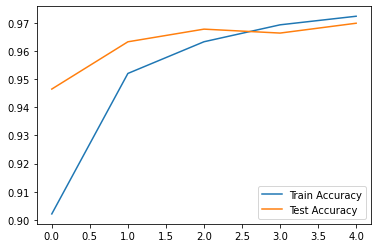

In [25]:
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

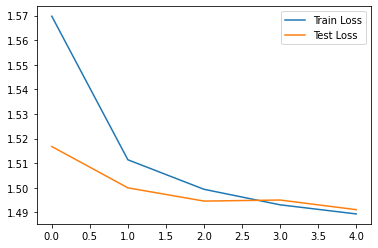

In [26]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

In [27]:
import numpy as np

In [28]:
np.argmax(model.predict(x_test[0].reshape(1,28,28)))

7

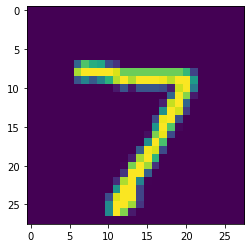

In [29]:
plt.imshow(x_test[0])

In [30]:
np.argmax(model.predict(x_test[10].reshape(1,28,28)))

0

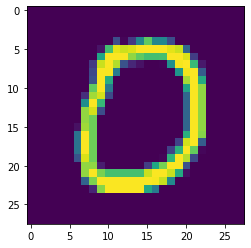

In [31]:
plt.imshow(x_test[10])

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [33]:
from tensorflow.keras.datasets import fashion_mnist
#from tensorflow.keras.datasets import mnist

In [34]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
import matplotlib.pyplot as plt

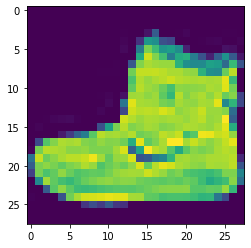

In [37]:
plt.imshow(x_train[0])

In [38]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')

In [41]:
x_train.shape

(60000, 28, 28, 1)

In [42]:
train_df = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)

In [43]:
train_df

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>

In [44]:
test_df = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [45]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, (3,3), activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.out = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.out(x)

In [46]:
model = MyModel()

In [47]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [48]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='train_Accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_Accuracy')

In [49]:
@tf.function
def train_step(image, labels):
  with tf.GradientTape() as tape:
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_acc(labels, predictions)

In [50]:
@tf.function
def test_step(images, labels):
  predictions = model(images, training=False)
  loss = loss_object(labels, predictions)

  test_loss(loss)
  test_acc(labels, predictions)

In [53]:
epochs = 5
for epoch in range(epochs):
    train_loss.reset_states()
    train_acc.reset_states()
    test_loss.reset_states()
    test_acc.reset_states()

    for images, labels in train_df:
        train_step(images, labels)
  
    for t_images, t_labels in test_df:
        test_step(t_images, t_labels)

    print(f"Epoch : {epoch}, Loss : {train_loss.result()}, Accuracy : {train_acc.result()} ")
    print(f"                 Test Loss : {test_loss.result()}, Test Accuracy : {test_acc.result()} ")
    print("*" * 50)

Epoch : 0, Loss : 2.30260968208313, Accuracy : 0.09708333015441895 
                 Test Loss : 2.3025851249694824, Test Accuracy : 0.10000000149011612 
**************************************************
Epoch : 1, Loss : 2.3026113510131836, Accuracy : 0.0964166671037674 
                 Test Loss : 2.3025848865509033, Test Accuracy : 0.10000000149011612 
**************************************************
Epoch : 2, Loss : 2.302612781524658, Accuracy : 0.09536666423082352 
                 Test Loss : 2.3025848865509033, Test Accuracy : 0.10000000149011612 
**************************************************
Epoch : 3, Loss : 2.30260968208313, Accuracy : 0.09726666659116745 
                 Test Loss : 2.3025858402252197, Test Accuracy : 0.10000000149011612 
**************************************************
Epoch : 4, Loss : 2.3026132583618164, Accuracy : 0.09849999845027924 
                 Test Loss : 2.3025856018066406, Test Accuracy : 0.10000000149011612 
**********************